In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [ ]:
data = pd.read_excel("/content/Online Retail.xlsx", sheet_name ='Online Retail')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Exploring Data

In [ ]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Columns: 8 entries, InvoiceNo to Country
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Percentage of null values in all columns
data.isnull().sum()/len(data)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [ ]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
data.value_counts("CustomerID")

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14119.0       1
13747.0       1
15590.0       1
15562.0       1
17925.0       1
Length: 4372, dtype: int64

There are total 4372 unique customers

In [ ]:
stock_code = data.value_counts("StockCode").reset_index()
stock_code

,StockCode,0
0,85123A,2313
1,22423,2203
2,85099B,2159
3,47566,1727
4,20725,1639
...,...,...
4065,84031b,1
4066,84031a,1
4067,82613a,1
4068,20950,1


In [ ]:
stock_code[stock_code[0]==1]

,StockCode,0
3837,90126A,1
3838,90214U,1
3839,DCGS0057,1
3840,90183c,1
3841,90127A,1
...,...,...
4065,84031b,1
4066,84031a,1
4067,82613a,1
4068,20950,1


In [ ]:
stock_code[stock_code[0]==0]

,StockCode,0


In [ ]:
data[data['StockCode'].isin(stock_code[stock_code[0]==1]['StockCode'])].value_counts("CustomerID")

CustomerID
14808.0    2
13113.0    2
14493.0    2
17231.0    2
14472.0    2
16156.0    1
15069.0    1
15078.0    1
15299.0    1
15574.0    1
15891.0    1
15998.0    1
16719.0    1
15005.0    1
16885.0    1
16915.0    1
17551.0    1
17883.0    1
17997.0    1
18014.0    1
18018.0    1
15048.0    1
12472.0    1
14911.0    1
12567.0    1
12783.0    1
13078.0    1
13081.0    1
13221.0    1
13600.0    1
13623.0    1
13694.0    1
13709.0    1
13777.0    1
13790.0    1
14046.0    1
14395.0    1
14505.0    1
14583.0    1
14723.0    1
18110.0    1
dtype: int64

There are total 4070 unique products

In [ ]:
data.value_counts("InvoiceNo")

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
557509       1
540264       1
540272       1
557501       1
569420       1
Length: 25900, dtype: int64

In [ ]:
data['InvoiceNo'].describe()

count     541909
unique     25900
top       573585
freq        1114
Name: InvoiceNo, dtype: int64

In [ ]:
data['StockCode'].describe()

count     541909
unique      4070
top       85123A
freq        2313
Name: StockCode, dtype: object

In [ ]:
data['Description'].describe()

count                                 540455
unique                                  4223
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2369
Name: Description, dtype: object

In [ ]:
data['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
data['InvoiceDate'].describe()

<ipython-input-235-b45d2d7a7dfa>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['InvoiceDate'].describe()


count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [ ]:
data['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
data['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [ ]:
data['Country'].describe()

count             541909
unique                38
top       United Kingdom
freq              495478
Name: Country, dtype: object

In [ ]:
data[(data['InvoiceNo'].str.lower().str.startswith('c', na=False)) & (data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
data[(data['Quantity']<0) & (~data['InvoiceNo'].str.lower().str.startswith('c', na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [ ]:
data[(data['Quantity']<0) & (~data['InvoiceNo'].str.lower().str.startswith('c', na=False)) & (data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [ ]:
data[(data['CustomerID'].isna()==True) & (data['UnitPrice']==0) & (data['Description'].isna()==False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom


In [ ]:
data[data['Description'].isin(['damages',"thrown away-can't sell",'Unsaleable, destroyed.','ebay'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom
51049,540638,72038P,damages,-990,2011-01-10 12:14:00,0.0,NaN,United Kingdom
105719,545236,22797,damages,-15,2011-03-01 10:32:00,0.0,NaN,United Kingdom
114428,546010,22423,damages,-19,2011-03-08 15:55:00,0.0,NaN,United Kingdom
115808,546140,21527,damages,-30,2011-03-09 16:35:00,0.0,NaN,United Kingdom
117896,546409,21833,damages,-110,2011-03-11 16:27:00,0.0,NaN,United Kingdom
131399,547560,72732,thrown away-can't sell,-2472,2011-03-23 17:28:00,0.0,NaN,United Kingdom
146599,548999,84743C,damages,-26,2011-04-05 14:34:00,0.0,NaN,United Kingdom
150350,549427,22797,damages,-12,2011-04-08 11:56:00,0.0,NaN,United Kingdom
166266,550908,20827,damages,-68,2011-04-21 12:39:00,0.0,NaN,United Kingdom


In [ ]:
data[data['Description'].isin(['damages',"thrown away-can't sell",'Unsaleable, destroyed.','ebay'])].shape

(60, 8)

# Data Preprocessing

*Handling Null Values*






Exploring CustomerID Feature

In [ ]:
data[data['CustomerID'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
distinct_counts = data.groupby('InvoiceNo')['CustomerID'].nunique().reset_index()
distinct_counts

,InvoiceNo,CustomerID
0,536365,1
1,536366,1
2,536367,1
3,536368,1
4,536369,1
...,...,...
25895,C581484,1
25896,C581490,1
25897,C581499,1
25898,C581568,1


In [ ]:
distinct_counts[distinct_counts['CustomerID']>1]

,InvoiceNo,CustomerID


In [ ]:
distinct_counts[distinct_counts['CustomerID']==0]['InvoiceNo']

43        536414
84        536544
85        536545
86        536546
87        536547
          ...   
25661    C578097
25729    C579757
25769    C579907
25816    C580604
25817    C580605
Name: InvoiceNo, Length: 3710, dtype: object

There are total 3710 invoices for which there is no customer ID available

In [ ]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data[(data['CustomerID'].isna()==True) & (data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,0.0


In [ ]:
data[(data['Description'].isna()==True) & (data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,-0.0
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,0.0
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,0.0
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0


In [ ]:
data[(data['Description'].isna()==True) & (data['CustomerID'].isna()==True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,-0.0
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,0.0
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,0.0
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0


In [ ]:
data[(data['CustomerID'].isna()==True) & (data['UnitPrice']==0)& (data['Description'].isna()==True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,-0.0
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,0.0
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,0.0
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0


In [ ]:
data[(data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,0.0


In [ ]:
zero_unit_price_and_not_null_customer = data[(data['UnitPrice']==0) & (data['CustomerID'].isna()==False)]
zero_unit_price_and_not_null_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0


In [ ]:
zero_unit_price_and_not_null_customer.shape

(40, 9)

In [ ]:
invoice_total_prices = data.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()

In [ ]:
invoice_total_prices[invoice_total_prices['TotalPrice']==0]

,InvoiceNo,TotalPrice
43,536414,0.0
85,536545,0.0
86,536546,0.0
87,536547,0.0
88,536549,0.0
...,...,...
21904,581226,0.0
21910,581234,0.0
21962,581406,0.0
21964,581408,0.0


In [ ]:
invoice_total_prices[(invoice_total_prices['InvoiceNo'].isin(distinct_counts[distinct_counts['CustomerID']==0]['InvoiceNo'])) & (invoice_total_prices['TotalPrice']==0)]

,InvoiceNo,TotalPrice
43,536414,0.0
85,536545,0.0
86,536546,0.0
87,536547,0.0
88,536549,0.0
...,...,...
21904,581226,0.0
21910,581234,0.0
21962,581406,0.0
21964,581408,0.0


In [ ]:
data[data['InvoiceNo'].isin(invoice_total_prices[(invoice_total_prices['InvoiceNo'].isin(distinct_counts[distinct_counts['CustomerID']==0]['InvoiceNo'])) & (invoice_total_prices['TotalPrice']==0)]['InvoiceNo'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,0.0


there are 2102  invoices for which Total Price is 0.

In [ ]:
data[data['Description']=='POLYESTER FILLER PAD 40x40cm']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,2010-12-01 14:41:00,1.45,17841.0,United Kingdom,1.45
4875,536813,46000S,POLYESTER FILLER PAD 40x40cm,2,2010-12-02 16:59:00,1.45,15646.0,United Kingdom,2.90
14792,537619,46000S,POLYESTER FILLER PAD 40x40cm,12,2010-12-07 13:53:00,1.45,13786.0,United Kingdom,17.40
32752,539118,46000S,POLYESTER FILLER PAD 40x40cm,25,2010-12-16 11:27:00,1.45,15563.0,United Kingdom,36.25
55852,541002,46000S,POLYESTER FILLER PAD 40x40cm,2,2011-01-13 10:33:00,1.45,12951.0,United Kingdom,2.90
...,...,...,...,...,...,...,...,...,...
520653,580295,46000S,POLYESTER FILLER PAD 40x40cm,2,2011-12-02 13:49:00,1.45,17841.0,United Kingdom,2.90
522733,580438,46000S,POLYESTER FILLER PAD 40x40cm,10,2011-12-04 12:17:00,1.45,12827.0,United Kingdom,14.50
531659,580958,46000S,POLYESTER FILLER PAD 40x40cm,1,2011-12-06 14:30:00,1.45,17266.0,United Kingdom,1.45
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.00,NaN,United Kingdom,0.00


So First UnitPrice Feature should be handled before CustomerID and Description

Unit Price Field - There are some products for which unit price is 0 but it should not be, hence it is wrong data, i will replace it with the price available in other invoice for same stock code.


In [ ]:
data['UnitPrice'] = data['UnitPrice'].replace(0, np.nan)

In [ ]:
#Missing values in the "UnitPrice" column replaced based on the values within the same "StockCode" group
data['UnitPrice'] = data.groupby('StockCode')['UnitPrice'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [ ]:
data['UnitPrice'] = data['UnitPrice'].replace(np.nan, 0)

In [ ]:
data[(data['CustomerID'].isna()==True) & (data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2011-10-31 15:16:00,0.0,NaN,United Kingdom,-0.0
431380,573595,79323S,"Unsaleable, destroyed.",-674,2011-10-31 15:17:00,0.0,NaN,United Kingdom,-0.0
431382,573597,79341,"Unsaleable, destroyed.",-905,2011-10-31 15:18:00,0.0,NaN,United Kingdom,-0.0
431383,573598,79342B,"Unsaleable, destroyed.",-1128,2011-10-31 15:18:00,0.0,NaN,United Kingdom,-0.0


In [ ]:
data[(data['CustomerID'].isna()==True) & (data['UnitPrice']==0) & (data['Description'].isna()==False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
51049,540638,72038P,damages,-990,2011-01-10 12:14:00,0.0,NaN,United Kingdom,-0.0
82794,543257,84611B,thrown away,-1430,2011-02-04 16:06:00,0.0,NaN,United Kingdom,-0.0
82796,543259,84612B,thrown away,-162,2011-02-04 16:07:00,0.0,NaN,United Kingdom,-0.0
115489,546126,35611B,thrown away,-27,2011-03-09 14:52:00,0.0,NaN,United Kingdom,-0.0
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,NaN,United Kingdom,-0.0
131398,547559,72759,thrown away-can't sell.,-524,2011-03-23 17:27:00,0.0,NaN,United Kingdom,-0.0
131399,547560,72732,thrown away-can't sell,-2472,2011-03-23 17:28:00,0.0,NaN,United Kingdom,-0.0
185113,552733,23059,Thrown away-rusty,-2376,2011-05-11 10:48:00,0.0,NaN,United Kingdom,-0.0
254130,559296,23001,TRAVEL CARD WALLET DOTCOMGIFTSHOP,200,2011-07-07 12:35:00,0.0,NaN,United Kingdom,0.0
279251,561249,DCGS0073,ebay,-4,2011-07-26 11:51:00,0.0,NaN,United Kingdom,-0.0


In [ ]:
data[data['StockCode']==72759]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
131398,547559,72759,thrown away-can't sell.,-524,2011-03-23 17:27:00,0.0,NaN,United Kingdom,-0.0


In [ ]:
data[data['Description'].isin(['damages',"thrown away-can't sell",'Unsaleable, destroyed.','ebay'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,3.36,NaN,United Kingdom,-0.0
51049,540638,72038P,damages,-990,2011-01-10 12:14:00,0.00,NaN,United Kingdom,-0.0
105719,545236,22797,damages,-15,2011-03-01 10:32:00,16.95,NaN,United Kingdom,-0.0
114428,546010,22423,damages,-19,2011-03-08 15:55:00,12.75,NaN,United Kingdom,-0.0
115808,546140,21527,damages,-30,2011-03-09 16:35:00,6.95,NaN,United Kingdom,-0.0
117896,546409,21833,damages,-110,2011-03-11 16:27:00,1.69,NaN,United Kingdom,-0.0
131399,547560,72732,thrown away-can't sell,-2472,2011-03-23 17:28:00,0.00,NaN,United Kingdom,-0.0
146599,548999,84743C,damages,-26,2011-04-05 14:34:00,1.25,NaN,United Kingdom,-0.0
150350,549427,22797,damages,-12,2011-04-08 11:56:00,16.95,NaN,United Kingdom,-0.0
166266,550908,20827,damages,-68,2011-04-21 12:39:00,0.39,NaN,United Kingdom,-0.0


In [ ]:
data[(data['CustomerID'].isna()==True) & (data['UnitPrice']==0) & (data['Description'].isna()==False)].value_counts("InvoiceNo")

InvoiceNo
540638    1
561254    1
573597    1
573595    1
573593    1
573592    1
573590    1
573169    1
572615    1
572614    1
561253    1
543257    1
561249    1
559296    1
552733    1
547560    1
547559    1
546152    1
546126    1
543259    1
573598    1
dtype: int64

In [ ]:
data[(data['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [ ]:
data[(data['Quantity']<0) & (~data['InvoiceNo'].str.lower().str.startswith('c', na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,7.95,NaN,United Kingdom,-0.0
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,1.25,NaN,United Kingdom,-0.0
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.85,NaN,United Kingdom,-0.0
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.85,NaN,United Kingdom,-0.0
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,18.95,NaN,United Kingdom,-0.0
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,3.75,NaN,United Kingdom,-0.0
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.29,NaN,United Kingdom,-0.0
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.85,NaN,United Kingdom,-0.0
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.83,NaN,United Kingdom,-0.0


In [ ]:
data[(data['Quantity']<0) & (~data['InvoiceNo'].str.lower().str.startswith('c', na=False)) & (data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
7193,537001,21653,NaN,-6,2010-12-03 15:33:00,0.0,NaN,United Kingdom,-0.0
23764,538241,21431,NaN,-21,2010-12-10 12:00:00,0.0,NaN,United Kingdom,-0.0
50808,540560,21589,NaN,-14,2011-01-10 10:08:00,0.0,NaN,United Kingdom,-0.0
51049,540638,72038P,damages,-990,2011-01-10 12:14:00,0.0,NaN,United Kingdom,-0.0
52094,540683,84546,NaN,-45,2011-01-10 17:00:00,0.0,NaN,United Kingdom,-0.0
...,...,...,...,...,...,...,...,...,...
431377,573592,79323GR,"Unsaleable, destroyed.",-1158,2011-10-31 15:16:00,0.0,NaN,United Kingdom,-0.0
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2011-10-31 15:16:00,0.0,NaN,United Kingdom,-0.0
431380,573595,79323S,"Unsaleable, destroyed.",-674,2011-10-31 15:17:00,0.0,NaN,United Kingdom,-0.0
431382,573597,79341,"Unsaleable, destroyed.",-905,2011-10-31 15:18:00,0.0,NaN,United Kingdom,-0.0


In [ ]:
data[(data['InvoiceNo'].str.lower().str.startswith('c', na=False)) & (data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice


No Cancelled Record have 0 unit price

In [ ]:
data[data['InvoiceNo']==540638]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
51049,540638,72038P,damages,-990,2011-01-10 12:14:00,0.0,NaN,United Kingdom,-0.0


In [ ]:
data[(data['Description'].isna()==True) & (data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom,-0.0
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom,0.0


In [ ]:
data[(data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2011-10-31 15:16:00,0.0,NaN,United Kingdom,-0.0
431380,573595,79323S,"Unsaleable, destroyed.",-674,2011-10-31 15:17:00,0.0,NaN,United Kingdom,-0.0
431382,573597,79341,"Unsaleable, destroyed.",-905,2011-10-31 15:18:00,0.0,NaN,United Kingdom,-0.0
431383,573598,79342B,"Unsaleable, destroyed.",-1128,2011-10-31 15:18:00,0.0,NaN,United Kingdom,-0.0


There are total 134 products for which there is no price

Handling Description Feature

In [ ]:
data[data['Description'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,4.25,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,2.10,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,2.55,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,3.75,NaN,United Kingdom,-0.0
535326,581203,23406,NaN,15,2011-12-07 18:31:00,6.25,NaN,United Kingdom,0.0
535332,581209,21620,NaN,6,2011-12-07 18:35:00,1.25,NaN,United Kingdom,0.0
536981,581234,72817,NaN,27,2011-12-08 10:33:00,1.63,NaN,United Kingdom,0.0


In [ ]:
d_count = data.groupby('StockCode')['Description'].nunique().reset_index()

In [ ]:
d_count[d_count['Description']==0]

,StockCode,Description
5,10134,0
26,16053,0
80,20689,0
111,20738,0
159,20825,0
...,...,...
4046,DCGS0057,0
4047,DCGS0066P,0
4052,DCGS0071,0
4053,DCGS0072,0


In [ ]:
data[data['Description'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,4.25,NaN,United Kingdom,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,2.10,NaN,United Kingdom,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,2.55,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,3.75,NaN,United Kingdom,-0.0
535326,581203,23406,NaN,15,2011-12-07 18:31:00,6.25,NaN,United Kingdom,0.0
535332,581209,21620,NaN,6,2011-12-07 18:35:00,1.25,NaN,United Kingdom,0.0
536981,581234,72817,NaN,27,2011-12-08 10:33:00,1.63,NaN,United Kingdom,0.0


In [ ]:
#Missing values in the "Description" column replaced based on the values within the same "StockCode" group
data['Description'] = data.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [ ]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [ ]:
invoice_total_prices = data.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()

In [ ]:
invoice_total_prices[(invoice_total_prices['TotalPrice']==0)]

,InvoiceNo,TotalPrice
85,536545,0.0
88,536549,0.0
89,536550,0.0
91,536552,0.0
93,536554,0.0
...,...,...
18149,573593,0.0
18151,573595,0.0
18153,573597,0.0
18154,573598,0.0


In [ ]:
invoice_total_prices[(invoice_total_prices['InvoiceNo'].isin(distinct_counts[distinct_counts['CustomerID']==0]['InvoiceNo'])) & (invoice_total_prices['TotalPrice']==0)]

,InvoiceNo,TotalPrice
85,536545,0.0
88,536549,0.0
89,536550,0.0
91,536552,0.0
93,536554,0.0
...,...,...
18149,573593,0.0
18151,573595,0.0
18153,573597,0.0
18154,573598,0.0


In [ ]:
data[data['InvoiceNo'].isin(invoice_total_prices[(invoice_total_prices['InvoiceNo'].isin(distinct_counts[distinct_counts['CustomerID']==0]['InvoiceNo'])) & (invoice_total_prices['TotalPrice']==0)]['InvoiceNo'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2011-10-31 15:16:00,0.0,NaN,United Kingdom,-0.0
431380,573595,79323S,"Unsaleable, destroyed.",-674,2011-10-31 15:17:00,0.0,NaN,United Kingdom,-0.0
431382,573597,79341,"Unsaleable, destroyed.",-905,2011-10-31 15:18:00,0.0,NaN,United Kingdom,-0.0
431383,573598,79342B,"Unsaleable, destroyed.",-1128,2011-10-31 15:18:00,0.0,NaN,United Kingdom,-0.0


In [ ]:
data[data['Description'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom,-0.0
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom,0.0


Still there are 112 rows having no description value

In [ ]:
data[(data['Description'].isna()==True) & (data['CustomerID'].isna()==True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom,-0.0
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom,0.0


In [ ]:
data[(data['Description'].isna()==True) & (data['CustomerID'].isna()==True) & (data['UnitPrice']==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom,-0.0
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom,0.0


In [ ]:
anomaly_data = data[(data['Quantity']<0) & (~data['InvoiceNo'].str.lower().str.startswith('c', na=False))]
anomaly_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
2406,536589,21777,RECIPE BOX WITH METAL HEART,-10,2010-12-01 16:50:00,7.95,NaN,United Kingdom,-79.50
4347,536764,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER,-38,2010-12-02 14:42:00,1.25,NaN,United Kingdom,-47.50
7188,536996,22712,CARD DOLLY GIRL,-20,2010-12-03 15:30:00,0.85,NaN,United Kingdom,-17.00
7189,536997,22028,PENNY FARTHING BIRTHDAY CARD,-20,2010-12-03 15:30:00,0.85,NaN,United Kingdom,-17.00
7190,536998,85067,CREAM SWEETHEART WALL CABINET,-6,2010-12-03 15:30:00,18.95,NaN,United Kingdom,-113.70
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,3.75,NaN,United Kingdom,-97.50
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.29,NaN,United Kingdom,-304.50
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.85,NaN,United Kingdom,-25.50
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.83,NaN,United Kingdom,-280.54


In [ ]:
invoice_count = data[data['InvoiceNo'].isin(anomaly_data['InvoiceNo'])].value_counts('InvoiceNo').reset_index()
invoice_count

,InvoiceNo,0
0,536589,1
1,562547,1
2,562544,1
3,562464,1
4,562463,1
...,...,...
1331,549348,1
1332,549346,1
1333,549344,1
1334,549343,1


This data has 1336 records, and 1336 total invoices hence each invoice has only 1 product in it.

In [ ]:
invoice_count[invoice_count[0]==1]

,InvoiceNo,0
0,536589,1
1,562547,1
2,562544,1
3,562464,1
4,562463,1
...,...,...
1331,549348,1
1332,549346,1
1333,549344,1
1334,549343,1


Verifed

In [ ]:
df = data[~data['InvoiceNo'].isin(anomaly_data['InvoiceNo'])]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description        15
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133744
Country             0
TotalPrice          0
dtype: int64

In [ ]:
df[df['Description'].isna()==True].shape

(15, 9)

In [ ]:
df[df['CustomerID'].isna()==True].shape

(133744, 9)

In [ ]:
df[(df['CustomerID'].isna()==True) & (df['Description'].isna()==True)].shape

(15, 9)

In [ ]:
df[(df['Description'].isna()==True) & (df['UnitPrice']==0)].shape

(15, 9)

In [ ]:
df[df['UnitPrice']==0].shape

(19, 9)

In [ ]:
df[(df['CustomerID'].isna()==True) & (df['UnitPrice']==0)].shape

(19, 9)

In [ ]:
df[df['Description']=='thrown away']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
82795,543258,84611B,thrown away,1287,2011-02-04 16:06:00,0.0,NaN,United Kingdom,0.0


And there is no other products in our Relevant dataset from these invoices.

We can notice that most of these rows have unit price 0, hence they are contributing less to revenue so we can drop these rows

In [ ]:
# data = data.dropna(subset=["Description"])

In [ ]:
data[data['Description'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom,-0.0
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom,-0.0
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom,0.0


*All the columns are in proper format hence no data type conversion is necessary*

**Updating CustomerID Null values**

There are total 3710 unique invoices for which there is no CustomerID hence we cannot drop these rows as it will result in loss of lots of relevant data Hence I will replace it with some Customer ID based on Invoice Number.

*The replaced CustomerID will start with "RE"*

In [ ]:
#Missing values in the "CustomerID" column replaced based on the values within the same "InvoiceNo" group
data['CustomerID'] = data.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [ ]:
data[data['CustomerID'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,4.25,NaN,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


As we have explored above that there is no invoiceNo for which there are 2 distinct values of CustomerId Hence the count is still the same.

*So, we need to update the customerId with new values*

In [ ]:
invoices_with_empty_customer_id = df[df['CustomerID'].isna()]['InvoiceNo'].unique()

In [ ]:
#counting distinct invoice numbers having null customerID for replacing Null CustomerId with value
len(invoices_with_empty_customer_id)

3710

In [ ]:
# new_customer_id = "RE0001"
# customer_count = 1
# invoice_customer_mapping = {}
# for invoice_no in invoices_with_empty_customer_id:
#   if(invoice_no not in invoice_customer_mapping):
#     data.loc[data['InvoiceNo'] == invoice_no, 'CustomerID'] = new_customer_id
#     invoice_customer_mapping[invoice_no] = new_customer_id
#     customer_count += 1
#     new_customer_id = "RE" + str(customer_count).rjust(4,"0")
#   else:
#     data.loc[data['InvoiceNo'] == invoice_no, 'CustomerID'] = invoice_customer_mapping[invoice_no]

In [ ]:
data[data['CustomerID'].isna()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,4.25,NaN,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


In [ ]:
data[data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2011-10-31 15:16:00,0.0,NaN,United Kingdom,-0.0
431380,573595,79323S,"Unsaleable, destroyed.",-674,2011-10-31 15:17:00,0.0,NaN,United Kingdom,-0.0
431382,573597,79341,"Unsaleable, destroyed.",-905,2011-10-31 15:18:00,0.0,NaN,United Kingdom,-0.0
431383,573598,79342B,"Unsaleable, destroyed.",-1128,2011-10-31 15:18:00,0.0,NaN,United Kingdom,-0.0


# Statistical Analysis

**OUTLIER DETECTION USING IQR**

Since retail datasets can often have skewed distributions due to varying sales patterns, the IQR method can be effective to detect outliers.

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.630880,15287.690570,17.987795
std,218.081158,96.762575,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
data.shape

(541909, 9)

In [ ]:
quantity_q1 = data['Quantity'].quantile(0.25)
quantity_q3 = data['Quantity'].quantile(0.75)
quantity_iqr = quantity_q3 - quantity_q1

quant_lower_range = quantity_q1 - 3 * quantity_iqr
quant_upper_range = quantity_q3 + 3 * quantity_iqr
print(quant_lower_range)
print(quant_upper_range)


-26.0
37.0


In [ ]:
price_q1 = data['UnitPrice'].quantile(0.25)
price_q3 = data['UnitPrice'].quantile(0.75)
price_iqr = price_q3 - price_q1

price_lower_range = price_q1 - 3 * price_iqr
price_upper_range = price_q3 + 3 * price_iqr
print(price_lower_range)
print(price_upper_range)

-7.390000000000001
12.77


In [ ]:
data[(data['Quantity']>quant_lower_range) & (data['Quantity']<=quant_upper_range)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Total 21973 Outliers in Quantity field

In [ ]:
data[(data['UnitPrice']>price_lower_range) & (data['UnitPrice']<=price_upper_range)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Total 12850 Outliers in price column

***But It is obvious that products having low prices have high quantity purchases. So Outliers should be filtered based on an AND condition between these two columns***

In [ ]:
data = data[(data['UnitPrice']>price_lower_range) & (data['UnitPrice']<=price_upper_range) & (data['Quantity']>quant_lower_range) & (data['Quantity']<=quant_upper_range)]

***There are total 34804 Outliers in the dataset***

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,507010.000000,507010.000000,381380.000000,507010.000000
mean,6.132455,2.995192,15308.740110,12.507579
std,7.166389,2.587205,1709.589494,17.231321
min,-25.000000,0.000000,12347.000000,-262.800000
25%,1.000000,1.250000,13983.000000,3.300000
50%,3.000000,2.080000,15194.000000,8.300000
75%,10.000000,4.130000,16809.000000,16.500000
max,37.000000,12.750000,18287.000000,459.000000


**RELATIONS BETWEEN DIFFERENT COLUMNS**

*Using correlation Coefficient*

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

            Quantity  UnitPrice  CustomerID  TotalPrice
Quantity    1.000000  -0.316129   -0.119909    0.511288
UnitPrice  -0.316129   1.000000   -0.013401    0.272638
CustomerID -0.119909  -0.013401    1.000000   -0.096241
TotalPrice  0.511288   0.272638   -0.096241    1.000000


<ipython-input-213-e02734b85495>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


`It shows that there is a perfect negative correlation, but it is more close to 0 as compare to -1 hence there is a slighlty weak relationship between these two.`

# Data Visualization

In [ ]:
products_count = data.groupby('StockCode')['InvoiceNo'].nunique().reset_index()
products_count

,StockCode,InvoiceNo
0,10002,67
1,10080,22
2,10120,29
3,10125,83
4,10133,181
...,...,...
3970,PADS,4
3971,POST,95
3972,S,7
3973,gift_0001_10,9


In [ ]:
data.value_counts('Quantity')

Quantity
 1     139474
 2      79912
 12     61039
 6      40696
 4      38011
        ...  
-13        28
-23        23
-17        21
-19        21
-22        21
Length: 62, dtype: int64

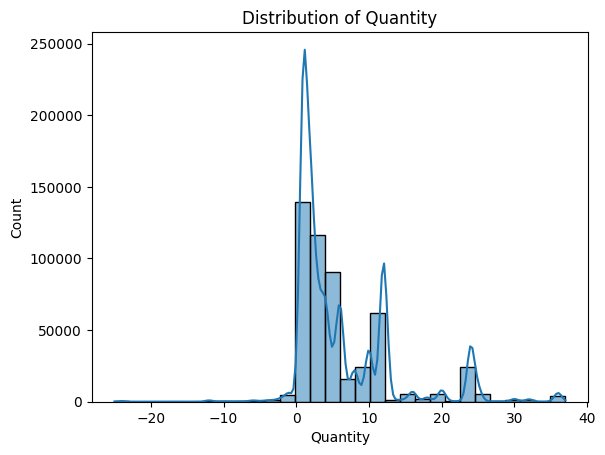

In [ ]:
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.show()

<ipython-input-217-ca5f56229589>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.resample('M').sum()['Quantity'].plot()


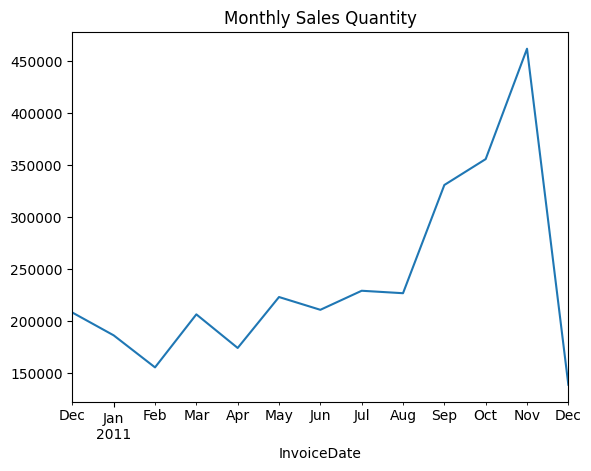

In [ ]:
#Time Series Analysis
data.set_index('InvoiceDate', inplace=True)
data.resample('M').sum()['Quantity'].plot()
plt.title('Monthly Sales Quantity')
plt.show()